In [2]:
import pandas as pd
import numpy as np
from matplotlib.image import imread
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

# Data collection and mise en forme

In [3]:
df = pd.read_table('RobbinsCraters_20121016.tsv', sep ='\t', encoding='latin-1', low_memory=False)
df

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,...,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384340,30-013686,-67.138,166.562,-67.139,166.562,1.00,0.01,1.03,0.96,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384341,30-013687,-73.986,39.069,-73.983,39.069,1.00,0.14,1.01,0.98,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384342,30-013688,-76.934,5.923,-76.934,5.923,1.00,0.02,1.07,0.93,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384343,30-013689,-79.415,63.528,-79.416,63.528,1.00,0.02,1.11,0.91,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


# Data cleaning

In [3]:
df.drop(df[
             (df['LATITUDE_CIRCLE_IMAGE'] >= -30) 
           & (df['LATITUDE_CIRCLE_IMAGE'] <= 30) 
           & (df['LATITUDE_ELLIPSE_IMAGE'] >= -30)
           & (df['LATITUDE_ELLIPSE_IMAGE'] <= 30)
           & (df['LONGITUDE_CIRCLE_IMAGE'] >= 0)
           & (df['LONGITUDE_CIRCLE_IMAGE'] <= 360) 
           & (df['LONGITUDE_ELLIPSE_IMAGE'] >= 0)
           & (df['LONGITUDE_ELLIPSE_IMAGE'] <= 360)
].index, inplace = True)

In [4]:
df

,CRATER_ID,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,...,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL,CRATER_NAME
0,01-000000,84.367,108.746,84.750,108.663,82.10,0.26,82.97,69.43,0.55,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,01-000001,72.760,164.464,72.784,164.464,82.02,0.09,84.17,79.91,0.31,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,Korolev
2,01-000002,69.244,-27.240,69.241,-27.235,79.63,NaN,84.36,75.28,0.45,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,01-000003,70.107,160.575,70.151,160.575,74.81,0.05,75.12,74.58,0.12,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,01-000004,77.996,95.617,77.998,95.615,73.53,0.23,77.28,70.13,0.42,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384340,30-013686,-67.138,166.562,-67.139,166.562,1.00,0.01,1.03,0.96,0.36,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384341,30-013687,-73.986,39.069,-73.983,39.069,1.00,0.14,1.01,0.98,0.25,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384342,30-013688,-76.934,5.923,-76.934,5.923,1.00,0.02,1.07,0.93,0.48,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
384343,30-013689,-79.415,63.528,-79.416,63.528,1.00,0.02,1.11,0.91,0.57,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [5]:
df.info()
df.describe()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 254619 entries, 0 to 384344
Data columns (total 70 columns):
 #   Column                      Non-Null Count   Dtype  
---  ------                      --------------   -----  
 0   CRATER_ID                   254619 non-null  object 
 1   LATITUDE_CIRCLE_IMAGE       254619 non-null  float64
 2   LONGITUDE_CIRCLE_IMAGE      254619 non-null  float64
 3   LATITUDE_ELLIPSE_IMAGE      254610 non-null  float64
 4   LONGITUDE_ELLIPSE_IMAGE     254610 non-null  float64
 5   DIAM_CIRCLE_IMAGE           254619 non-null  float64
 6   DIAM_CIRCLE_SD_IMAGE        243384 non-null  float64
 7   DIAM_ELLIPSE_MAJOR_IMAGE    254610 non-null  float64
 8   DIAM_ELLIPSE_MINOR_IMAGE    254610 non-null  float64
 9   DIAM_ELLIPSE_ECCEN_IMAGE    254610 non-null  float64
 10  DIAM_ELLIPSE_ELLIP_IMAGE    254610 non-null  float64
 11  DIAM_ELLIPSE_ANGLE_IMAGE    254611 non-null  float64
 12  LATITUDE_CIRCLE_TOPOG       48034 non-null   float64
 13  LONGITUDE_CIRC

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,...,LAYER_4_PERIMETER,LAYER_4_AREA,LAYER_4_LOBATENESS,LAYER_4_EJECTARAD_EQUIV,LAYER_4_EJECTARAD_REL,LAYER_5_PERIMETER,LAYER_5_AREA,LAYER_5_LOBATENESS,LAYER_5_EJECTARAD_EQUIV,LAYER_5_EJECTARAD_REL
count,254619.000000,254619.000000,254610.000000,254610.000000,254619.000000,243384.000000,254610.000000,254610.000000,254610.000000,254610.000000,...,16.000000,16.000000,16.000000,16.000000,16.000000,1.00,1.00,1.00,1.00,1.00
mean,-9.399796,-27.041713,-9.401520,-27.041887,3.557448,0.035212,3.733329,3.372251,0.429980,1.134705,...,459.298750,3989.531875,2.088750,24.472500,2.381875,1293.59,23217.31,2.34,69.73,3.85
std,39.332315,93.341950,39.330763,93.342233,8.694836,0.035031,8.921713,8.078107,0.135837,0.124948,...,209.347828,3452.574715,0.328042,10.742143,0.494668,NaN,NaN,NaN,NaN,NaN
min,-86.700000,-179.997000,-86.700000,-179.996000,1.000000,0.000000,1.000000,0.560000,0.020000,1.000000,...,211.180000,979.090000,1.440000,12.180000,1.710000,1293.59,23217.31,2.34,69.73,3.85
25%,-40.554500,-93.348000,-40.554750,-93.349000,1.190000,0.020000,1.270000,1.110000,0.340000,1.060000,...,278.285000,1521.890000,1.900000,15.802500,1.960000,1293.59,23217.31,2.34,69.73,3.85
50%,-17.234000,-34.228000,-17.237000,-34.228500,1.540000,0.030000,1.640000,1.440000,0.420000,1.100000,...,436.175000,3091.725000,2.080000,22.810000,2.325000,1293.59,23217.31,2.34,69.73,3.85
75%,26.161000,28.114000,26.156500,28.114750,2.580000,0.040000,2.740000,2.440000,0.520000,1.170000,...,555.310000,4488.545000,2.252500,27.330000,2.777500,1293.59,23217.31,2.34,69.73,3.85
max,85.702000,179.997000,85.734000,179.997000,1164.220000,8.900000,1123.420000,1056.230000,0.970000,4.230000,...,970.390000,13654.810000,2.710000,50.250000,3.330000,1293.59,23217.31,2.34,69.73,3.85


In [6]:
df.describe(include='object')

,CRATER_ID,MORPHOLOGY_CRATER_1,MORPHOLOGY_CRATER_2,MORPHOLOGY_CRATER_3,MORPHOLOGY_EJECTA_1,MORPHOLOGY_EJECTA_2,MORPHOLOGY_EJECTA_3,MORPHOLOGY_EJECTA_COMMENTS,CRATER_NAME
count,254619,44773,5569,39757,30070,14071,989,3889,786
unique,254619,13,127,227,147,101,24,70,786
top,01-000000,Smp,Terraced,Floor Deposits,Rd,HuSL,Pin-Cushion,There may be a cohesive lobe within the Rd eje...,Korolev
freq,1,23265,3434,27449,15745,4346,307,2828,1


In [7]:
df.isnull().sum().sum()

13228129

In [8]:
print(df.isna().sum().to_string())

CRATER_ID                          0
LATITUDE_CIRCLE_IMAGE              0
LONGITUDE_CIRCLE_IMAGE             0
LATITUDE_ELLIPSE_IMAGE             9
LONGITUDE_ELLIPSE_IMAGE            9
DIAM_CIRCLE_IMAGE                  0
DIAM_CIRCLE_SD_IMAGE           11235
DIAM_ELLIPSE_MAJOR_IMAGE           9
DIAM_ELLIPSE_MINOR_IMAGE           9
DIAM_ELLIPSE_ECCEN_IMAGE           9
DIAM_ELLIPSE_ELLIP_IMAGE           9
DIAM_ELLIPSE_ANGLE_IMAGE           8
LATITUDE_CIRCLE_TOPOG         206585
LONGITUDE_CIRCLE_TOPOG        206585
DIAM_CIRCLE_TOPOG             206585
DIAM_CIRCLE_SD_TOPOG          208825
DEPTH_RIM_TOPOG               206493
DEPTH_RIM_SD_TOPOG            206493
DEPTH_SURFACE_TOPOG           206493
DEPTH_SURFACE_SD_TOPOG        206493
DEPTH_FLOOR_TOPOG             206493
DEPTH_FLOOR_SD_TOPOG          206493
DEPTH_RIMFLOOR_TOPOG          206493
DEPTH_RIMHEIGHT_TOPOG         206493
DEPTH_SURFFLOOR_TOPOG         206493
PTS_USED_RIM_IMAGE                 0
PTS_USED_RIM_TOPOG            206488
P

In [9]:
df.loc[df.LATITUDE_ELLIPSE_IMAGE.isna(),'LATITUDE_ELLIPSE_IMAGE']=(df.LATITUDE_ELLIPSE_IMAGE.mean())
df.loc[df.LONGITUDE_ELLIPSE_IMAGE.isna(),'LONGITUDE_ELLIPSE_IMAGE']=(df.LONGITUDE_ELLIPSE_IMAGE.mean())
df.loc[df.DIAM_ELLIPSE_MAJOR_IMAGE.isna(),'DIAM_ELLIPSE_MAJOR_IMAGE']=(df.DIAM_ELLIPSE_MAJOR_IMAGE.mean())
df.loc[df.DIAM_ELLIPSE_MINOR_IMAGE.isna(),'DIAM_ELLIPSE_MINOR_IMAGE']=(df.DIAM_ELLIPSE_MINOR_IMAGE.mean())
df.loc[df.DIAM_ELLIPSE_ECCEN_IMAGE.isna(),'DIAM_ELLIPSE_ECCEN_IMAGE']=(df.DIAM_ELLIPSE_ECCEN_IMAGE.mean())
df.loc[df.DIAM_ELLIPSE_ELLIP_IMAGE.isna(),'DIAM_ELLIPSE_ELLIP_IMAGE']=(df.DIAM_ELLIPSE_ELLIP_IMAGE.mean())
df.loc[df.DIAM_ELLIPSE_ANGLE_IMAGE.isna(),'DIAM_ELLIPSE_ANGLE_IMAGE']=(df.DIAM_ELLIPSE_ANGLE_IMAGE.mean())
df.loc[df.DIAM_CIRCLE_SD_IMAGE.isna(),'DIAM_CIRCLE_SD_IMAGE']=(df.DIAM_CIRCLE_SD_IMAGE.mean())
df.loc[df.CRATER_NAME.isna(),'CRATER_NAME']=("UNKNOWN")

In [10]:
print(df.isna().sum().to_string())

CRATER_ID                          0
LATITUDE_CIRCLE_IMAGE              0
LONGITUDE_CIRCLE_IMAGE             0
LATITUDE_ELLIPSE_IMAGE             0
LONGITUDE_ELLIPSE_IMAGE            0
DIAM_CIRCLE_IMAGE                  0
DIAM_CIRCLE_SD_IMAGE               0
DIAM_ELLIPSE_MAJOR_IMAGE           0
DIAM_ELLIPSE_MINOR_IMAGE           0
DIAM_ELLIPSE_ECCEN_IMAGE           0
DIAM_ELLIPSE_ELLIP_IMAGE           0
DIAM_ELLIPSE_ANGLE_IMAGE           0
LATITUDE_CIRCLE_TOPOG         206585
LONGITUDE_CIRCLE_TOPOG        206585
DIAM_CIRCLE_TOPOG             206585
DIAM_CIRCLE_SD_TOPOG          208825
DEPTH_RIM_TOPOG               206493
DEPTH_RIM_SD_TOPOG            206493
DEPTH_SURFACE_TOPOG           206493
DEPTH_SURFACE_SD_TOPOG        206493
DEPTH_FLOOR_TOPOG             206493
DEPTH_FLOOR_SD_TOPOG          206493
DEPTH_RIMFLOOR_TOPOG          206493
DEPTH_RIMHEIGHT_TOPOG         206493
DEPTH_SURFFLOOR_TOPOG         206493
PTS_USED_RIM_IMAGE                 0
PTS_USED_RIM_TOPOG            206488
P

In [11]:
df.drop(df.columns[df.isnull().sum(axis=0) > 10], axis=1, inplace=True)
df.drop(['CRATER_ID'],axis = 1,inplace= True)

In [12]:
df

,LATITUDE_CIRCLE_IMAGE,LONGITUDE_CIRCLE_IMAGE,LATITUDE_ELLIPSE_IMAGE,LONGITUDE_ELLIPSE_IMAGE,DIAM_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,DIAM_ELLIPSE_MAJOR_IMAGE,DIAM_ELLIPSE_MINOR_IMAGE,DIAM_ELLIPSE_ECCEN_IMAGE,DIAM_ELLIPSE_ELLIP_IMAGE,DIAM_ELLIPSE_ANGLE_IMAGE,PTS_USED_RIM_IMAGE,CONFIDENCE_IMPACT_CRATER,CRATER_NAME
0,84.367,108.746,84.750,108.663,82.10,0.260000,82.97,69.43,0.55,1.20,-34.0,275,3,UNKNOWN
1,72.760,164.464,72.784,164.464,82.02,0.090000,84.17,79.91,0.31,1.05,44.0,977,4,Korolev
2,69.244,-27.240,69.241,-27.235,79.63,0.035212,84.36,75.28,0.45,1.12,-23.0,435,4,UNKNOWN
3,70.107,160.575,70.151,160.575,74.81,0.050000,75.12,74.58,0.12,1.01,99.0,370,4,UNKNOWN
4,77.996,95.617,77.998,95.615,73.53,0.230000,77.28,70.13,0.42,1.10,-8.0,422,4,UNKNOWN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
384340,-67.138,166.562,-67.139,166.562,1.00,0.010000,1.03,0.96,0.36,1.07,3.0,14,4,UNKNOWN
384341,-73.986,39.069,-73.983,39.069,1.00,0.140000,1.01,0.98,0.25,1.03,-32.0,9,4,UNKNOWN
384342,-76.934,5.923,-76.934,5.923,1.00,0.020000,1.07,0.93,0.48,1.14,-14.0,13,4,UNKNOWN
384343,-79.415,63.528,-79.416,63.528,1.00,0.020000,1.11,0.91,0.57,1.22,104.0,12,4,UNKNOWN


In [13]:
for col in df:
    print(len(df[col].unique()))

117875
172732
117820
172782
5439
80
5546
5295
97
216
293
713
5
787


In [14]:
# for i, col in enumerate(df.columns):
#     if df[col].dtypes=='int64' or df[col].dtypes=='float64':
#         plt.figure(i)
#         sns.boxplot(df[col])  

In [15]:
# for i, col in enumerate(df.columns):
#     if df[col].dtypes=='int64' or df[col].dtypes=='float64':
#         a = f"{col}"
#         df.hist(column=a)

In [16]:
# for i, col in enumerate(df.columns):
#     if df[col].dtypes=='int64' or df[col].dtypes=='float64':
#         a = f"{col}"
#         df.plot.scatter(x=a,y='CRATER_NAME')

In [17]:
sns.set(style="ticks")
# sns.pairplot(df)

# Splitting dataset into train and test sets

In [18]:
X = df.iloc[:,:12]
y = df.iloc[:,12].values

In [19]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=0.2,
                                                random_state=0)

In [20]:
X_train.shape

(203695, 12)

In [21]:
X_test.shape

(50924, 12)

In [22]:
y.mean()

3.9937121738754766

In [23]:
print(y_train.mean())
print(y_test.mean())

3.993887920665701
3.993009190165737


# k Nearest Neighbors

In [24]:
from sklearn.neighbors import KNeighborsClassifier
from sklearn.model_selection import GridSearchCV
knn = KNeighborsClassifier(n_neighbors = 5)

In [25]:
knn.fit(X_train,y_train)

KNeighborsClassifier()

In [26]:
y_pred_knn = knn.predict(X_test)

In [27]:
for i in range(10):
    print(y_test[i], y_pred_knn[i])

4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4
4 4


# Metrics

In [28]:
from sklearn.metrics import accuracy_score, confusion_matrix, classification_report
from sklearn.metrics import precision_score, recall_score
from sklearn.metrics import classification_report

In [29]:
print('Confusion matrix knn \n', confusion_matrix(y_test,y_pred_knn))
print('Accuracy knn', accuracy_score(y_test,y_pred_knn))

Confusion matrix knn 
 [[    0     0     0     0     2]
 [    0     0     0     0    39]
 [    0     0     0     0    63]
 [    0     0     0     0   105]
 [    0     0     0     1 50714]]
Accuracy knn 0.995876207682036


In [30]:
print('Recall knn', recall_score(y_test,y_pred_knn,pos_label='positive',average='micro'))
print('Precision knn', precision_score(y_test,y_pred_knn,pos_label='positive',average='micro'))

Recall knn 0.995876207682036
Precision knn 0.995876207682036


In [31]:
print(classification_report(y_test,y_pred_knn))

              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       105
           4       1.00      1.00      1.00     50715

    accuracy                           1.00     50924
   macro avg       0.20      0.20      0.20     50924
weighted avg       0.99      1.00      0.99     50924



In [32]:
parameters = {'n_neighbors' : [1,2,3,4,5,6,7,8,9,10,11]}
model = KNeighborsClassifier()
clf = GridSearchCV(model,parameters, scoring='accuracy', cv=5)
grille = clf.fit(X_train,y_train)
print(grille.best_params_)
print(grille.best_score_)

{'n_neighbors': 5}
0.9962689314907092


In [33]:
y_pred_knn_o = grille.predict(X_test)
print('Confusion matrix knn op \n', confusion_matrix(y_test,y_pred_knn_o))
print('Accuracy knn op', accuracy_score(y_test,y_pred_knn_o))
print('Recall knn op', recall_score(y_test,y_pred_knn_o,pos_label='positive',average='micro'))
print('Precision knn op', precision_score(y_test,y_pred_knn_o,pos_label='positive',average='micro'))

Confusion matrix knn op 
 [[    0     0     0     0     2]
 [    0     0     0     0    39]
 [    0     0     0     0    63]
 [    0     0     0     0   105]
 [    0     0     0     1 50714]]
Accuracy knn op 0.995876207682036
Recall knn op 0.995876207682036
Precision knn op 0.995876207682036


# Logistic Regression

In [34]:
from sklearn.linear_model import LogisticRegression
LR = LogisticRegression()
LR.fit(X_train,y_train)
y_predictLR = LR.predict(X_test)
print(confusion_matrix(y_test,y_predictLR))
print(classification_report(y_test,y_predictLR))

[[    0     0     0     0     2]
 [    0     0     0     0    39]
 [    0     0     0     0    63]
 [    0     0     0     0   105]
 [    0     1     1     0 50713]]
              precision    recall  f1-score   support

           0       0.00      0.00      0.00         2
           1       0.00      0.00      0.00        39
           2       0.00      0.00      0.00        63
           3       0.00      0.00      0.00       105
           4       1.00      1.00      1.00     50715

    accuracy                           1.00     50924
   macro avg       0.20      0.20      0.20     50924
weighted avg       0.99      1.00      0.99     50924



# CNN

In [35]:
# import itertools

# from keras.utils.np_utils import to_categorical # convert to one-hot-encoding
# from keras.models import Sequential
# from keras.layers import Dense, Dropout, Flatten, Conv2D, MaxPool2D
# from keras.optimizers import RMSprop,Adam
# from keras.preprocessing.image import ImageDataGenerator
# from keras.callbacks import ReduceLROnPlateau

# model = Sequential()
# model.add(Conv2D(filters = 8, kernel_size = (5,5),padding = 'Same', 
#                  activation ='relu', input_shape = (28,28,1)))
# model.add(MaxPool2D(pool_size=(2,2)))
# model.add(Dropout(0.25))
# #
# model.add(Conv2D(filters = 16, kernel_size = (3,3),padding = 'Same', 
#                  activation ='relu'))
# model.add(MaxPool2D(pool_size=(2,2), strides=(2,2)))
# model.add(Dropout(0.25))
# # fully connected
# model.add(Flatten())
# model.add(Dense(256, activation = "relu"))
# model.add(Dropout(0.5))
# model.add(Dense(10, activation = "softmax"))
# optimizer = Adam(lr=0.001, beta_1=0.9, beta_2=0.999)
# model.compile(optimizer = optimizer , loss = "categorical_crossentropy", metrics=["accuracy"])
# epochs = 10  # for better result increase the epochs
# batch_size = 250
# # data augmentation
# datagen = ImageDataGenerator(
#         featurewise_center=False,  # set input mean to 0 over the dataset
#         samplewise_center=False,  # set each sample mean to 0
#         featurewise_std_normalization=False,  # divide inputs by std of the dataset
#         samplewise_std_normalization=False,  # divide each input by its std
#         zca_whitening=False,  # dimesion reduction
#         rotation_range=5,  # randomly rotate images in the range 5 degrees
#         zoom_range = 0.1, # Randomly zoom image 10%
#         width_shift_range=0.1,  # randomly shift images horizontally 10%
#         height_shift_range=0.1,  # randomly shift images vertically 10%
#         horizontal_flip=False,  # randomly flip images
#         vertical_flip=False)  # randomly flip images

# datagen.fit(X_train)
# history = model.fit_generator(datagen.flow(X_train,y_train, batch_size=batch_size),
#                               epochs = epochs, validation_data = (X_val,Y_val), steps_per_epoch=X_train.shape[0] // batch_size)


In [31]:
dff = pd.read_table('RobbinsCraters_20121016.tsv', sep ='\t', encoding='latin-1', low_memory=False)
dff.drop(dff[
             (dff['LATITUDE_CIRCLE_IMAGE'] >= -30) 
           & (dff['LATITUDE_CIRCLE_IMAGE'] <= 30) 
           & (dff['LATITUDE_ELLIPSE_IMAGE'] >= -30)
           & (dff['LATITUDE_ELLIPSE_IMAGE'] <= 30)
           & (dff['LONGITUDE_CIRCLE_IMAGE'] >= 0)
           & (dff['LONGITUDE_CIRCLE_IMAGE'] <= 360) 
           & (dff['LONGITUDE_ELLIPSE_IMAGE'] >= 0)
           & (dff['LONGITUDE_ELLIPSE_IMAGE'] <= 360)
].index, inplace = True)
dff.loc[dff.LATITUDE_ELLIPSE_IMAGE.isna(),'LATITUDE_ELLIPSE_IMAGE']=(dff.LATITUDE_ELLIPSE_IMAGE.mean())
dff.loc[dff.LONGITUDE_ELLIPSE_IMAGE.isna(),'LONGITUDE_ELLIPSE_IMAGE']=(dff.LONGITUDE_ELLIPSE_IMAGE.mean())
dff.loc[dff.DIAM_ELLIPSE_MAJOR_IMAGE.isna(),'DIAM_ELLIPSE_MAJOR_IMAGE']=(dff.DIAM_ELLIPSE_MAJOR_IMAGE.mean())
dff.loc[dff.DIAM_ELLIPSE_MINOR_IMAGE.isna(),'DIAM_ELLIPSE_MINOR_IMAGE']=(dff.DIAM_ELLIPSE_MINOR_IMAGE.mean())
dff.loc[dff.DIAM_ELLIPSE_ECCEN_IMAGE.isna(),'DIAM_ELLIPSE_ECCEN_IMAGE']=(dff.DIAM_ELLIPSE_ECCEN_IMAGE.mean())
dff.loc[dff.DIAM_ELLIPSE_ELLIP_IMAGE.isna(),'DIAM_ELLIPSE_ELLIP_IMAGE']=(dff.DIAM_ELLIPSE_ELLIP_IMAGE.mean())
dff.loc[dff.DIAM_ELLIPSE_ANGLE_IMAGE.isna(),'DIAM_ELLIPSE_ANGLE_IMAGE']=(dff.DIAM_ELLIPSE_ANGLE_IMAGE.mean())
dff.loc[dff.DIAM_CIRCLE_SD_IMAGE.isna(),'DIAM_CIRCLE_SD_IMAGE']=(dff.DIAM_CIRCLE_SD_IMAGE.mean())
dff.loc[dff.CRATER_NAME.isna(),'CRATER_NAME']=("UNKNOWN")
dff.drop(dff.columns[dff.isnull().sum(axis=0) > 10], axis=1, inplace=True)
xx = "LONGITUDE_CIRCLE_IMAGE"
yy = "LATITUDE_CIRCLE_IMAGE"
rr = "DIAM_CIRCLE_SD_IMAGE"
dff = dff[['CRATER_ID',xx,yy,rr]]
di=dff[[xx,yy,rr]]
# di=dff[['LATITUDE_CIRCLE_IMAGE','LONGITUDE_CIRCLE_IMAGE','DIAM_CIRCLE_IMAGE']]
di=(di-di.min())/(di.max()-di.min())
di['CRATER_ID'] = dff['CRATER_ID']
# dff =(dff-dff.mean())/dff.std()
di

,LONGITUDE_CIRCLE_IMAGE,LATITUDE_CIRCLE_IMAGE,DIAM_CIRCLE_SD_IMAGE,CRATER_ID
0,0.802077,0.992256,0.029213,01-000000
1,0.956852,0.924931,0.010112,01-000001
2,0.424332,0.904537,0.003956,01-000002
3,0.946049,0.909543,0.005618,01-000003
4,0.765607,0.955302,0.025843,01-000004
...,...,...,...,...
384340,0.962680,0.113467,0.001124,30-013686
384341,0.608527,0.073746,0.015730,30-013687
384342,0.516453,0.056647,0.002247,30-013688
384343,0.676470,0.042256,0.002247,30-013689


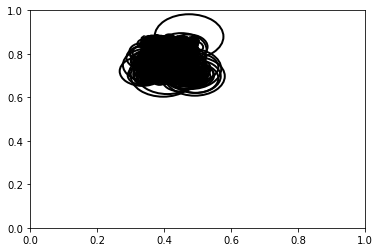

In [30]:
fig, ax = plt.subplots()
for i,j in enumerate(di.values) :
    if(int(j[3][:2]) == 4):
        circle = plt.Circle((j[0], j[1]), j[2],color = 'k', linewidth=2, fill=False)
        ax.add_patch(circle)

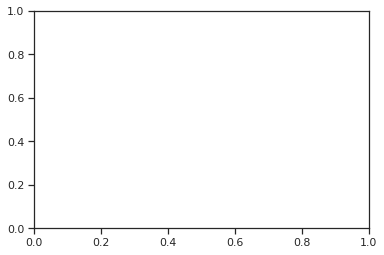

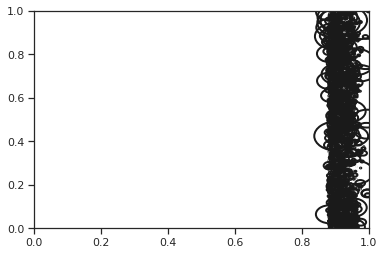

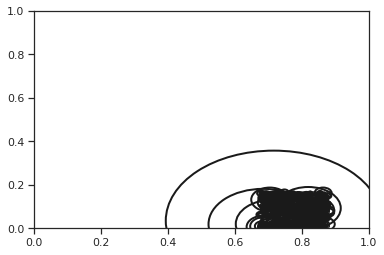

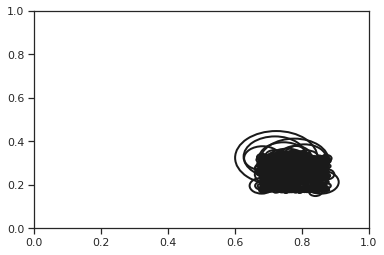

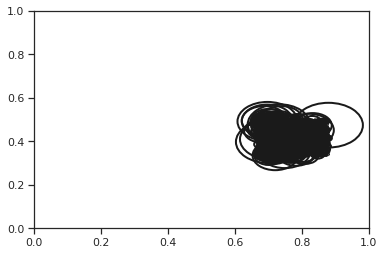

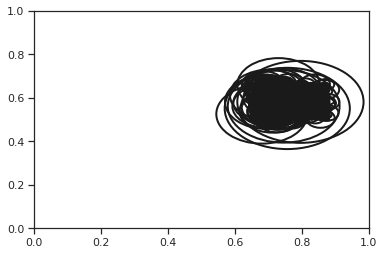

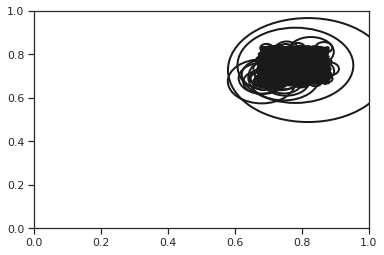

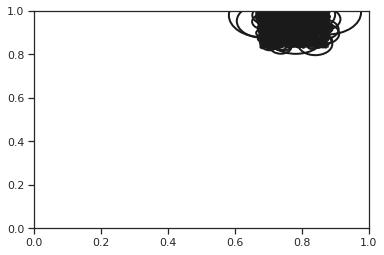

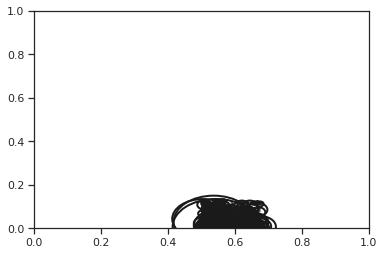

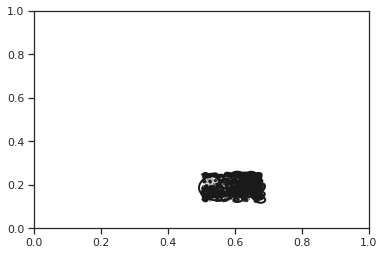

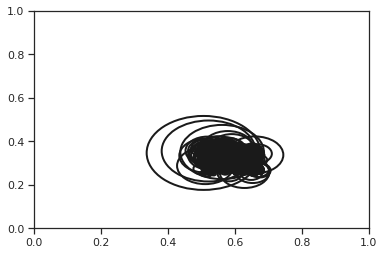

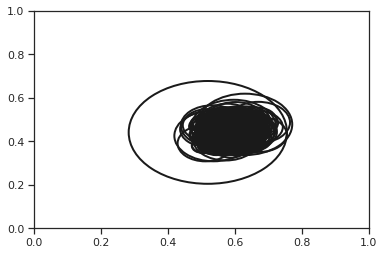

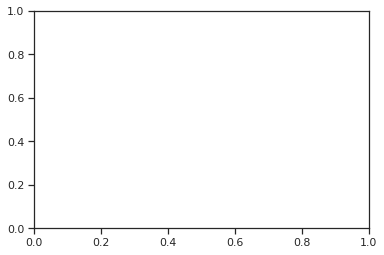

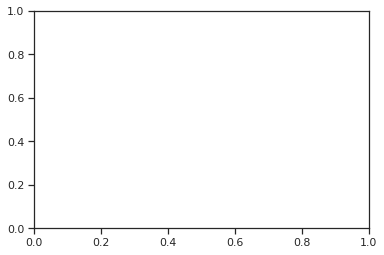

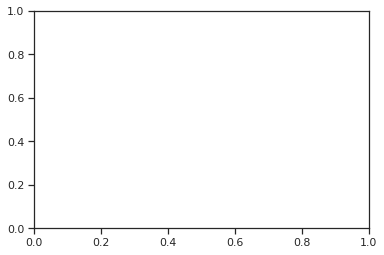

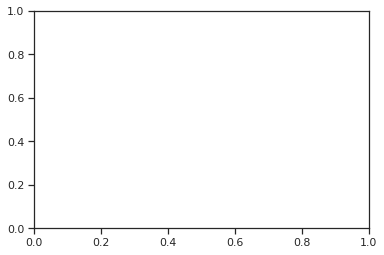

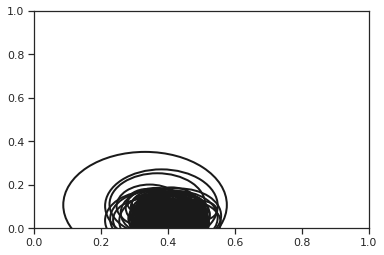

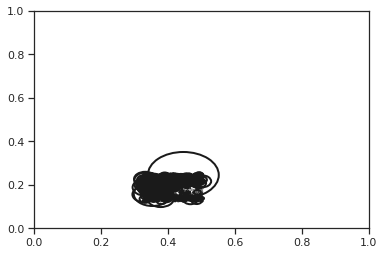

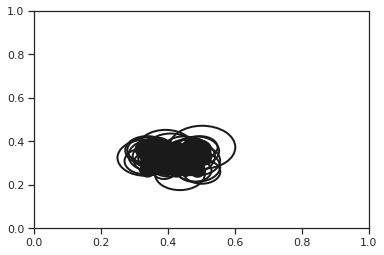

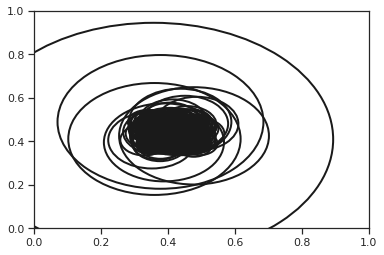

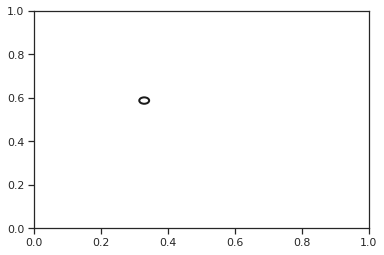

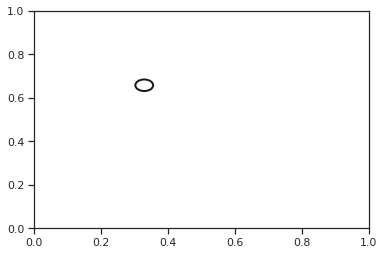

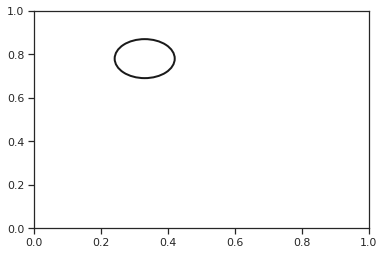

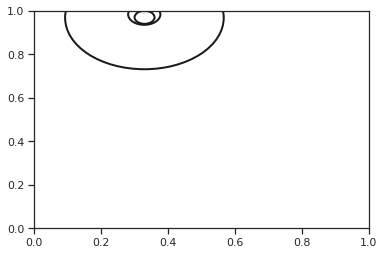

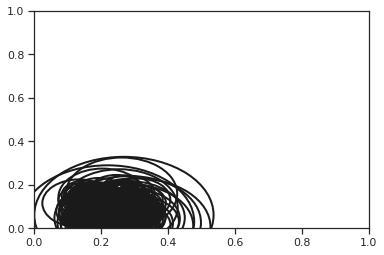

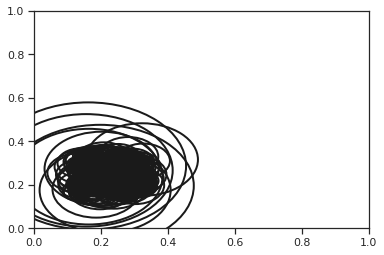

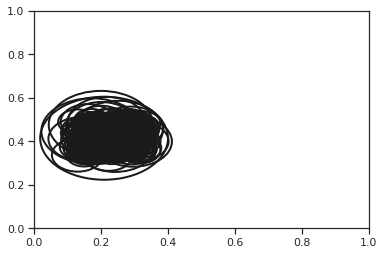

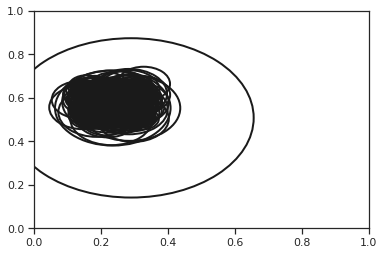

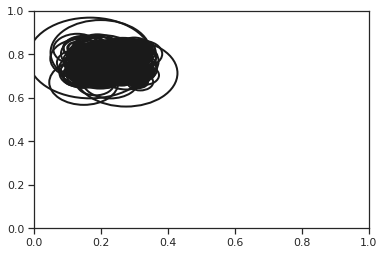

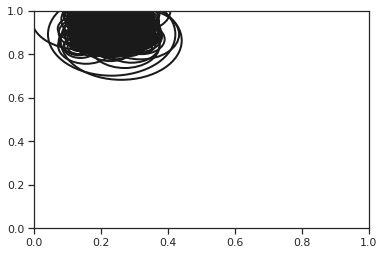

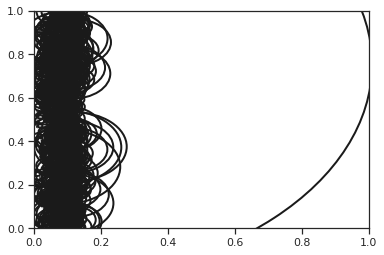

In [112]:
for k in range(31):
    fig, ax = plt.subplots()
    for i,j in enumerate(di.values) :
        if(int(j[3][:2]) == k):
            circle = plt.Circle((j[0], j[1]), j[2],color = 'k', linewidth=2, fill=False)
            ax.add_patch(circle)

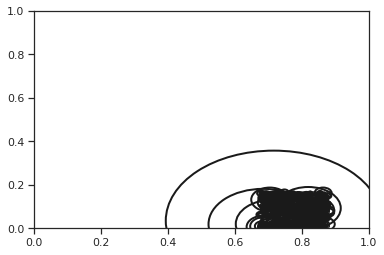